In [2]:
import os
import cv2       # computer vision --> to load image and process image
import numpy as np  # for arrays
import matplotlib.pyplot as  plt   # for visualization
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Preprocessing
normailzation

In [ ]:
# normailze the data from (0 - 255) to (0 - 1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
 # give the probabilty of each digit to be the right answer

In [ ]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))   # epoch -> how many iterations we are goint to see

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2485 - accuracy: 0.9245 - val_loss: 0.1373 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0998 - accuracy: 0.9685 - val_loss: 0.0993 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.0879 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 0.0874 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0977 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.1056 - val_accuracy

In [ ]:
# we need now to save it
model.save('handwritten.model')
#models = tf.keras.model.load_data('handwritten.model') # we can just use this to represent the model

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9795
Loss: 0.09080708026885986
Accuracy: 0.9794999957084656


In [ ]:
image_model = 1
while os.path.isfile(f"/content/digits/{image_model}.png"):
    try:
        img = cv2.imread(f"/content/digits/{image_model}.png")[:,:,0]
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        #img = img.reshape(1, 28, 28)
        #img = tf.keras.utils.normalize(img, axis=1)
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
      image_model += 1




#print(f"/content/digits/digit{image_model}.png")

Text(0.5, 1.0, 'training and test accuracy')

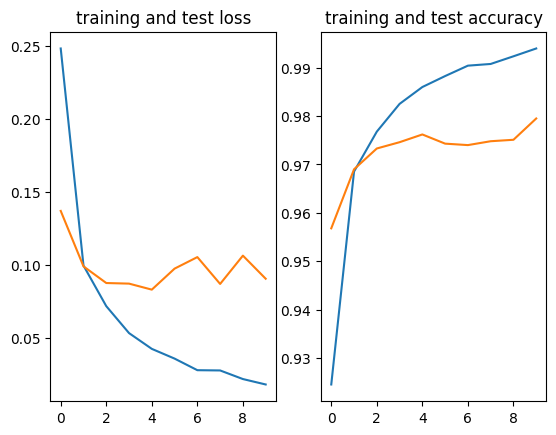

In [ ]:
accuracy=hist.history["accuracy"]
Val_accuracy=hist.history["val_accuracy"]
loss=hist.history["loss"]
val_loss=hist.history["val_loss"]


fig,ax=plt.subplots(1,2)
ax[0].plot(np.arange(10),loss,label="training")
ax[0].plot(np.arange(10),val_loss,label="test")
ax[0].set_title("training and test loss")


ax[1].plot(np.arange(10),accuracy,label="training")
ax[1].plot(np.arange(10),Val_accuracy,label="test")
ax[1].set_title("training and test accuracy")

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred

array([[7.6534432e-11, 1.1848557e-09, 5.6571031e-10, ..., 9.9999923e-01,
        3.6125217e-11, 7.6815525e-07],
       [5.0149036e-17, 1.1467540e-09, 9.9999994e-01, ..., 2.9210967e-10,
        4.1544772e-15, 1.8739760e-24],
       [9.2353191e-12, 9.9999982e-01, 2.1047464e-09, ..., 8.1052015e-08,
        3.6926789e-08, 3.2171214e-12],
       ...,
       [1.4147420e-14, 9.3158079e-14, 1.8604023e-14, ..., 4.0321840e-11,
        5.5409392e-11, 4.2612953e-08],
       [1.3272089e-13, 8.5148230e-13, 9.1106974e-12, ..., 1.6161815e-11,
        1.3701682e-08, 1.4924274e-11],
       [7.2284253e-12, 2.6899865e-15, 1.2833698e-14, ..., 4.0312579e-20,
        4.6114089e-12, 5.4139814e-13]], dtype=float32)

In [ ]:
y_pred_class=[]

for i in range(len(y_pred)):
    y_pred_class.append(np.where(y_pred[i]==y_pred[i].max())[0][0])

dict={"the_Predication":y_pred_class,"the_Actual":y_test}

df=pd.DataFrame(dict)
df

,the_Predication,the_Actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


<Axes: >

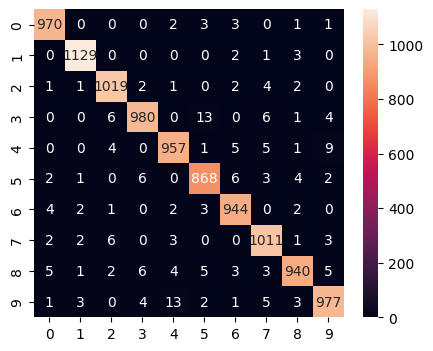

In [ ]:
cm=confusion_matrix(y_pred=y_pred_class,y_true=y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='')

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25